## Data Analysis

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from collections import Counter
import os

In [3]:
df = pd.read_csv('Data/langthanghanoiofficial_cleaned.csv')

ƒê√¢y l√† d·ªØ li·ªáu thu th·∫≠p ƒë∆∞·ª£c t·ª´ fanpage langthanghanoi bao g·ªìm d·ªØ li·ªáu c·ªßa 121 b√†i vi·∫øt k·ªÉ t·ª´ n√†y 4-11-2023 ƒë·∫øn ng√†y 9-11-2023.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        100 non-null    int64         
 1   text                           100 non-null    object        
 2   post_text                      100 non-null    object        
 3   shared_text                    100 non-null    object        
 4   original_text                  100 non-null    object        
 5   time                           100 non-null    datetime64[ns]
 6   timestamp                      100 non-null    int64         
 7   images_description             100 non-null    object        
 8   images_lowquality              100 non-null    object        
 9   images_lowquality_description  100 non-null    object        
 10  likes                          100 non-null    int64         
 11  comments            

## B√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c cao nh·∫•t

In [5]:
df['total_interactions'] = df['likes'] + df['comments'] + df['shares']
top_post = df.loc[df['total_interactions'].idxmax()]
top_post

post_id                                                            641239981517512
text                             H√ÄNG M√É NGAY L√öC N√ÄY ‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è\n\nƒê√ìN NOEL S·ªöM TH...
post_text                        H√ÄNG M√É NGAY L√öC N√ÄY ‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è\n\nƒê√ìN NOEL S·ªöM TH...
shared_text                                                               Kh√¥ng c√≥
original_text                                                             Kh√¥ng c√≥
time                                                           2023-11-06 08:53:58
timestamp                                                               1699260838
images_description               ['May be an image of one or more people, chris...
images_lowquality                ['https://scontent.fhan5-8.fna.fbcdn.net/v/t39...
images_lowquality_description    ['May be an image of one or more people, chris...
likes                                                                        16000
comments                                   

## T√≠nh trung b√¨nh s·ªë l∆∞·ª£t 'likes', 'comments', v√† 'shares'

In [6]:
average_likes = df['likes'].mean()
average_comments = df['comments'].mean()
average_shares = df['shares'].mean()

S·ªë l∆∞·ª£t like trung b√¨nh m·ªói b√†i

In [7]:
average_likes

4527.29

S·ªë l∆∞·ª£t comments trung b√¨nh m·ªói b√†i

In [8]:
average_comments

1339.21

S·ªë l∆∞·ª£t shares trung b√¨nh m·ªói b√†i

In [9]:
average_shares

183.05

## Th·ªùi gian ƒëƒÉng b√†i

In [10]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
hourly_distribution = df['hour'].value_counts().sort_index()

<Axes: xlabel='hour'>

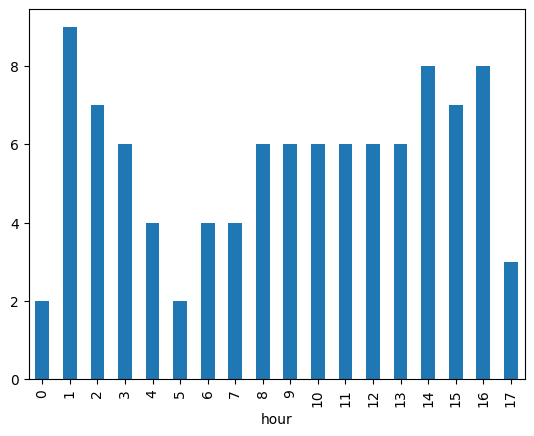

In [11]:
hourly_distribution.plot(kind='bar')

## L∆∞·ª£t t∆∞∆°ng t√°c theo th·ªùi gian


<Axes: xlabel='time'>

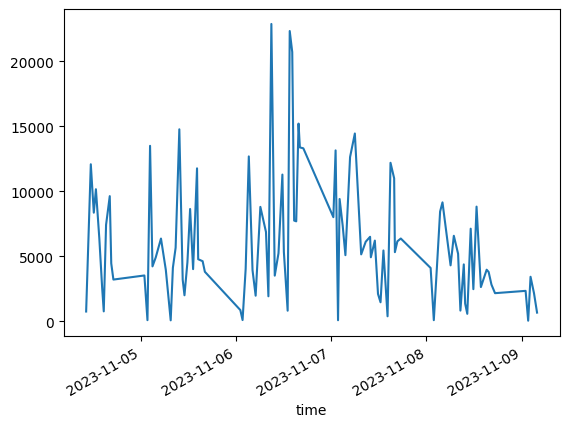

In [12]:
df.set_index('time')['total_interactions'].plot()

S·ªë l∆∞·ª£t t∆∞∆°ng t√°c theo gi·ªù


<Axes: title={'center': 'T∆∞∆°ng t√°c theo gi·ªù trong ng√†y'}, xlabel='hour'>

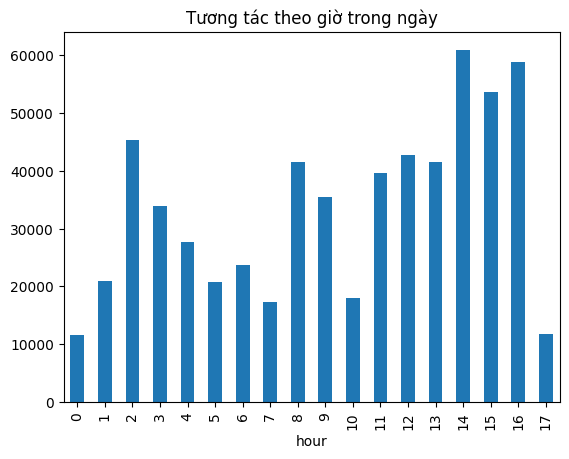

In [13]:
interactions_by_hour = df.groupby('hour')['total_interactions'].sum().sort_index()
interactions_by_hour.plot(kind='bar', title='T∆∞∆°ng t√°c theo gi·ªù trong ng√†y')

## T∆∞∆°ng Quan Gi·ªØa S·ªë L∆∞·ª£ng Reactions v√† C√°c Tr∆∞·ªùng Kh√°c

In [14]:
correlation = df[['likes', 'comments', 'shares']].corr()

<Axes: >

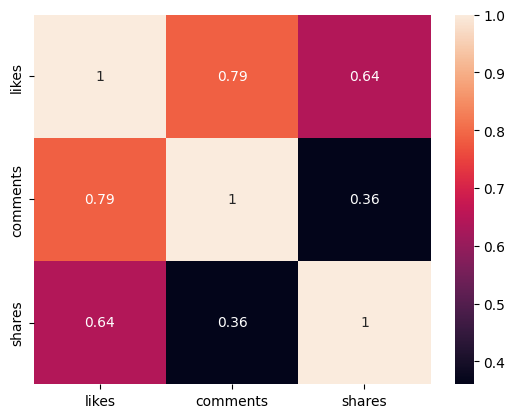

In [15]:
sns.heatmap(correlation, annot=True)

## Ph√¢n t√≠ch s·ªë l∆∞·ª£ng c√°c reactions kh√°c nhau ƒë∆∞·ª£c th·∫£

In [16]:
first_row = df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions

{'like': 298,
 'love': 3,
 'haha': 30,
 'care': 1,
 'sad': 1,
 'shares': 5,
 'comments': 365}

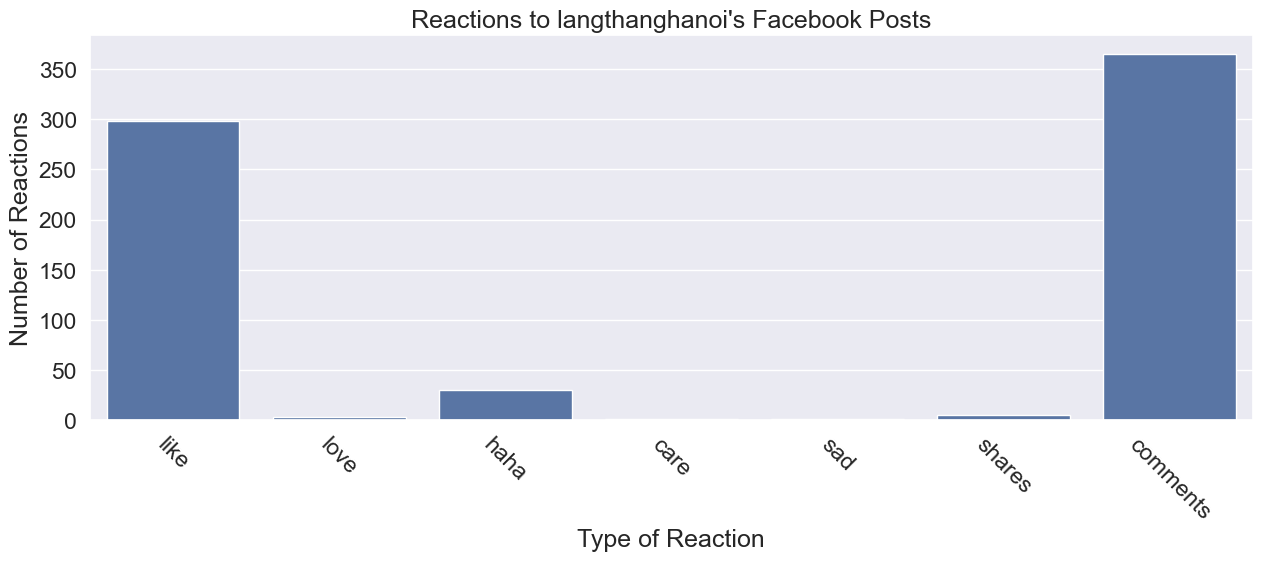

In [17]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to langthanghanoi's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## ƒê·ªçc t·∫•t c·∫£ c√°c posts

In [18]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
0   642571108051066  T..A..G NG∆Ø·ªúI TH·ª® 2 ‚ÄºÔ∏è S·∫º BAO B·∫†N ƒêI CAFE ‚ÄºÔ∏è\n...
1   642556798052497  TIN BU·ªíN CHO NG∆Ø·ªúI C√î ƒê∆†N ‚ÄºÔ∏è\n\nƒê√äM CH·ª¶ NH·∫¨T M...
2   642540428054134  T√Ä X√ôA V√ÄO M√ôA SƒÇN M√ÇY ƒê·∫∏P NH·∫§T NƒÇM ‚ÄºÔ∏è\n\nB√åNH...
3   642528298055347  T..A..G NG∆Ø·ªúI B·∫†N T√äN T ‚ÄºÔ∏è\n\nS·∫º T·∫∂NG B·∫†N V√ÅY ...
4   642516461389864  L∆∞∆°ng th√°ng 5 tr·∫πo ·ªü\nH√† N·ªôi th√¨ n√™n ƒÉn g√¨ cho...
..              ...                                                ...
95  640386361602874  H·ªí T√ÇY NGAY L√öC N√ÄY ‚ÄºÔ∏è\n\nRA M√Ä XEM H·ªå ƒê∆ØA NG∆Ø...
96  640363138271863  ∆† t·ªëi th·ª© 7 m√† ko ƒëi ch∆°i v·ªõi ng∆∞·ªùi y√™u √† ? ü§£\...
97  640350884939755  H·∫°nh ph√∫c l√†...\n\nƒêi l√†m m·ªôt ng√†y ƒë∆∞·ª£c 300k, ...
98  640335034941340       T·ªëi nay m√† c√≥ ai r·ªß ƒëi H·ªì T√¢y th√¨ th√≠ch nh·ªâüßê
99  640312471610263  CH·ªà C·∫¶N EM N√ìI ‚ÄúEM ƒê√ìI‚Äù ‚ù§Ô∏è\n\nTh√¨ 10km t·ª´ H√† ƒê...

[100 rows x 2 columns]

T·ªïng h·ª£p nh·ªØng t·ª´ ng·ªØ xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong post_text

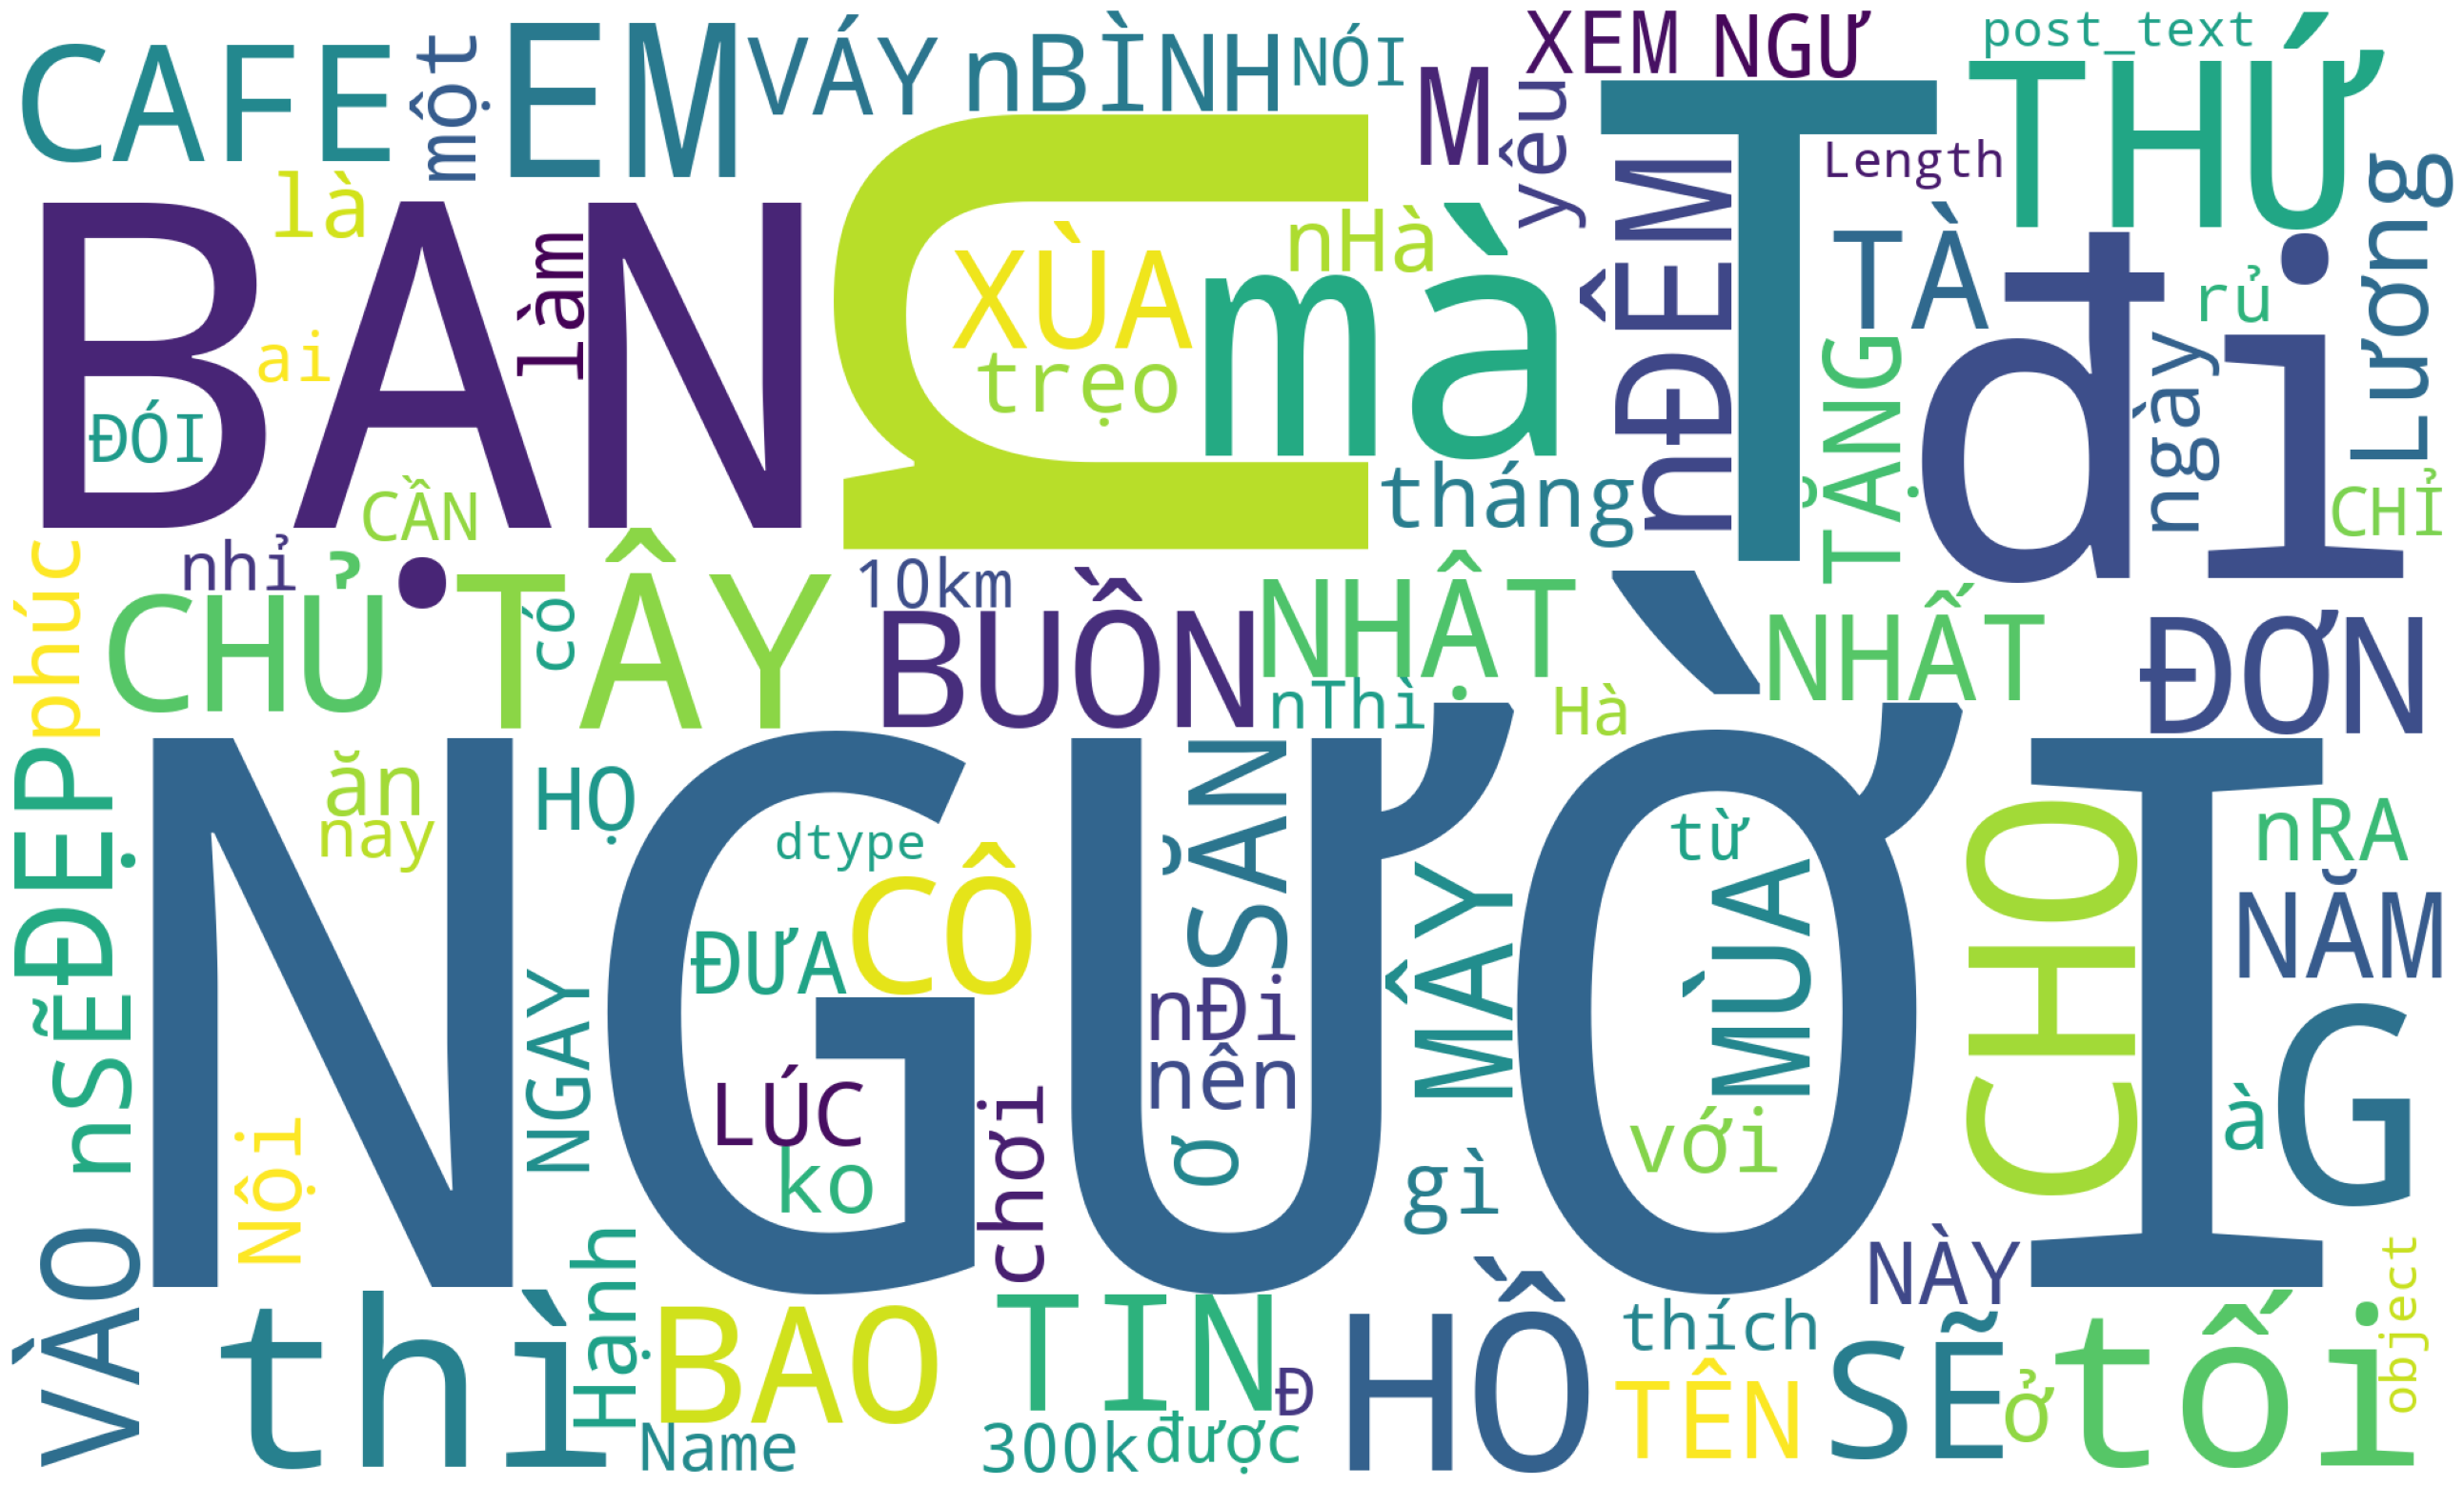

In [19]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Hashtags ph·ªï bi·∫øn


In [20]:
# H√†m tr√≠ch xu·∫•t hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

In [21]:
# Tr√≠ch xu·∫•t hashtags t·ª´ m·ªói b√†i vi·∫øt
df['hashtags'] = df['post_text'].dropna().apply(extract_hashtags)
hashtags = str(df['hashtags'])

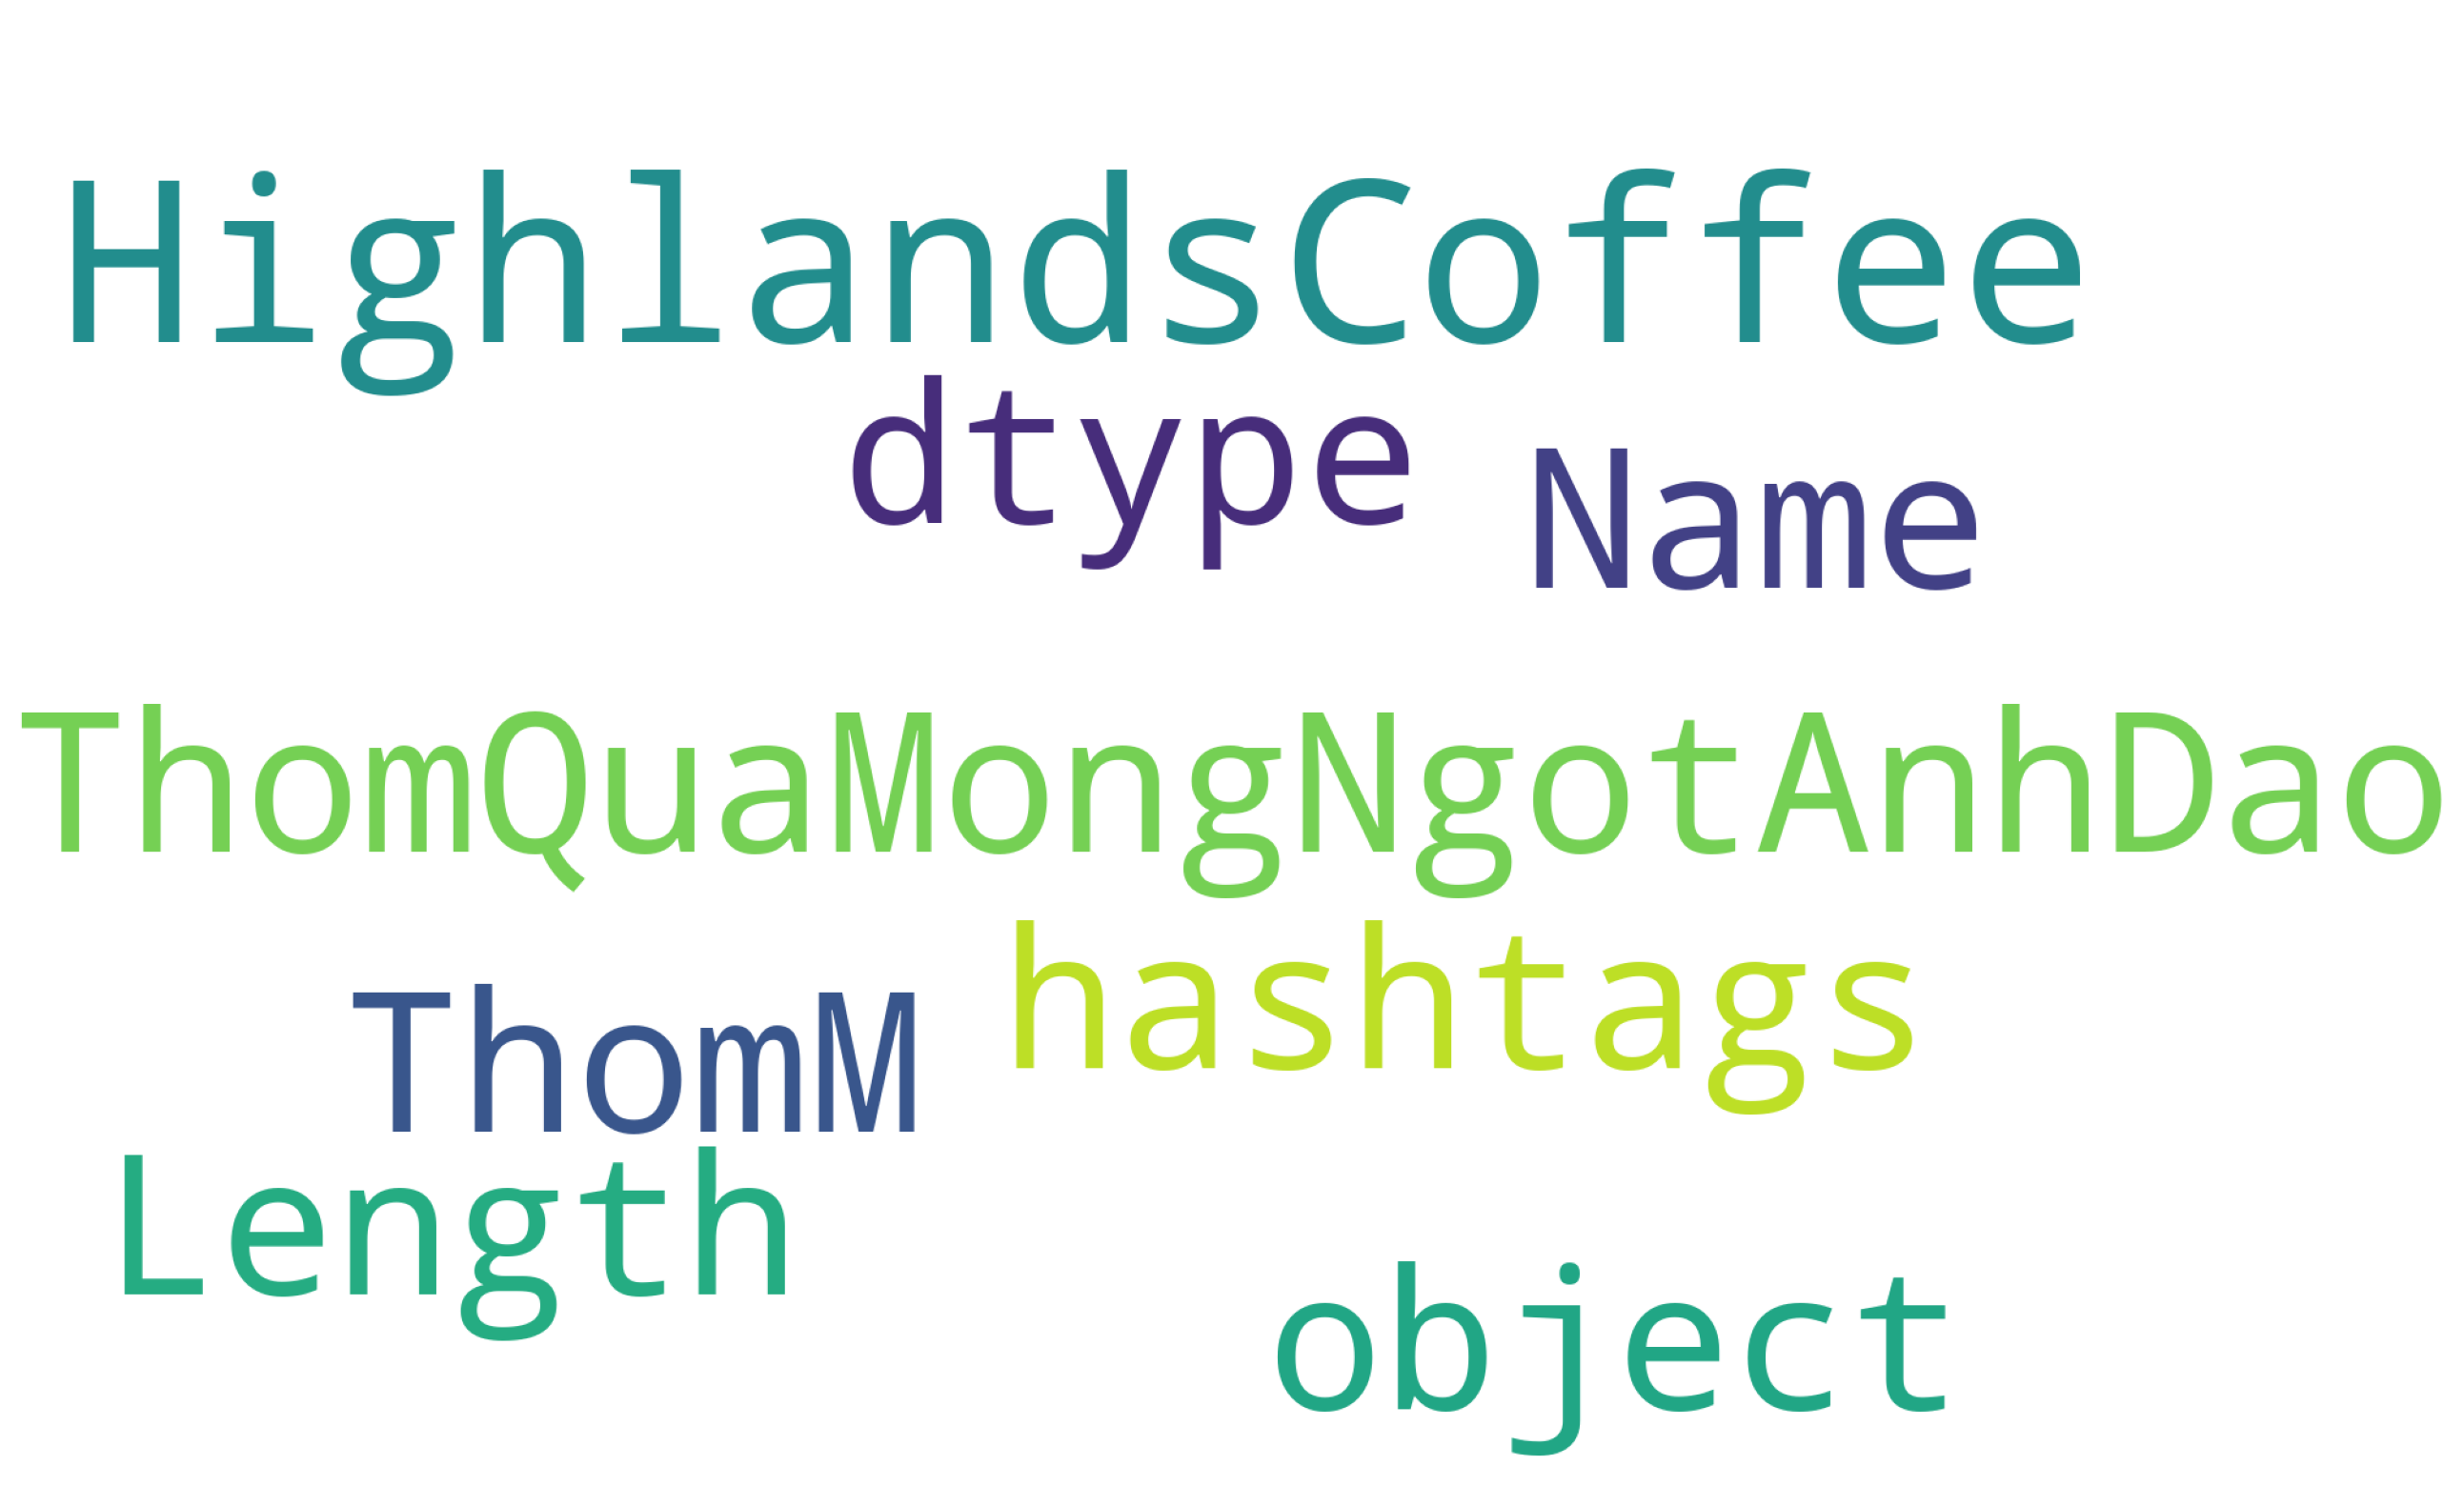

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      max_words=300, width=2000, height=1200).generate(hashtags)

# Tr·ª±c quan h√≥a WordCloud
plt.figure(figsize=(40, 20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## M·ªëi quan h·ªá gi·ªØa ƒë·ªô d√†i b√†i vi·∫øt v√† t∆∞∆°ng t√°c

In [23]:
# T√≠nh ƒë·ªô d√†i b√†i vi·∫øt (s·ª≠ d·ª•ng s·ªë t·ª´)
df['post_length'] = df['text'].apply(lambda x: len(str(x).split()))

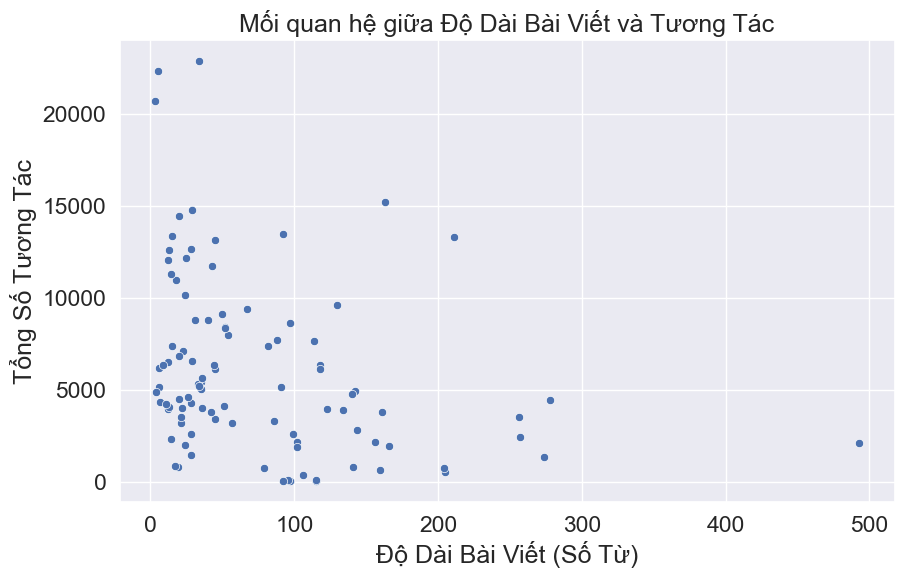

In [24]:
# Tr·ª±c quan h√≥a m·ªëi quan h·ªá
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='total_interactions')
plt.title('M·ªëi quan h·ªá gi·ªØa ƒê·ªô D√†i B√†i Vi·∫øt v√† T∆∞∆°ng T√°c')
plt.xlabel('ƒê·ªô D√†i B√†i Vi·∫øt (S·ªë T·ª´)')
plt.ylabel('T·ªïng S·ªë T∆∞∆°ng T√°c')
plt.show()

## M·ªëi quan h·ªá gi·ªØa Reaction v√† Comments

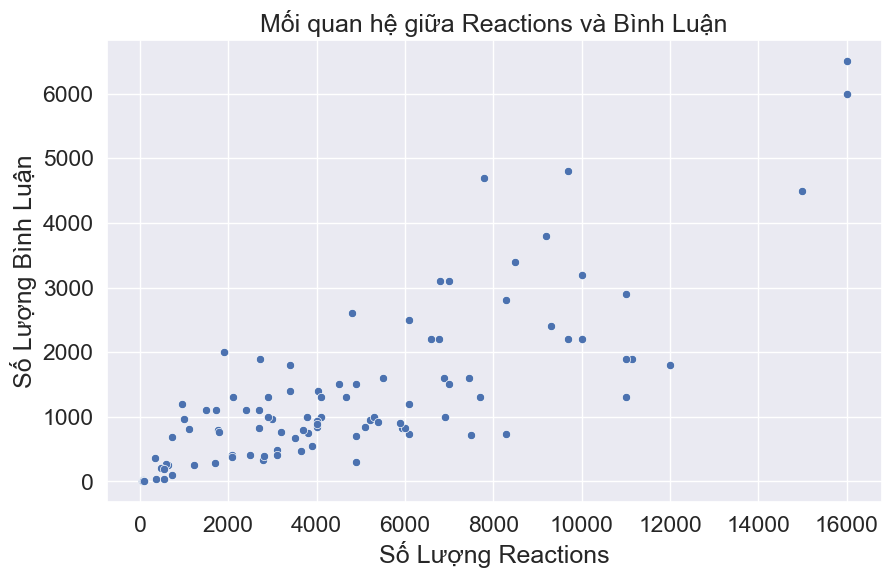

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reaction_count', y='comments')
plt.title('M·ªëi quan h·ªá gi·ªØa Reactions v√† B√¨nh Lu·∫≠n')
plt.xlabel('S·ªë L∆∞·ª£ng Reactions')
plt.ylabel('S·ªë L∆∞·ª£ng B√¨nh Lu·∫≠n')
plt.show()

## ·∫¢nh h∆∞·ªüng c·ªßa h√¨nh ·∫£nh ƒë·∫øn t∆∞∆°ng t√°c

In [26]:
# T·∫°o c·ªôt m·ªõi ƒë·ªÉ x√°c ƒë·ªãnh b√†i vi·∫øt c√≥ h√¨nh ·∫£nh hay kh√¥ng
df['has_image'] = (~df['images_description'].isna()) | (~df['images_lowquality'].isna())

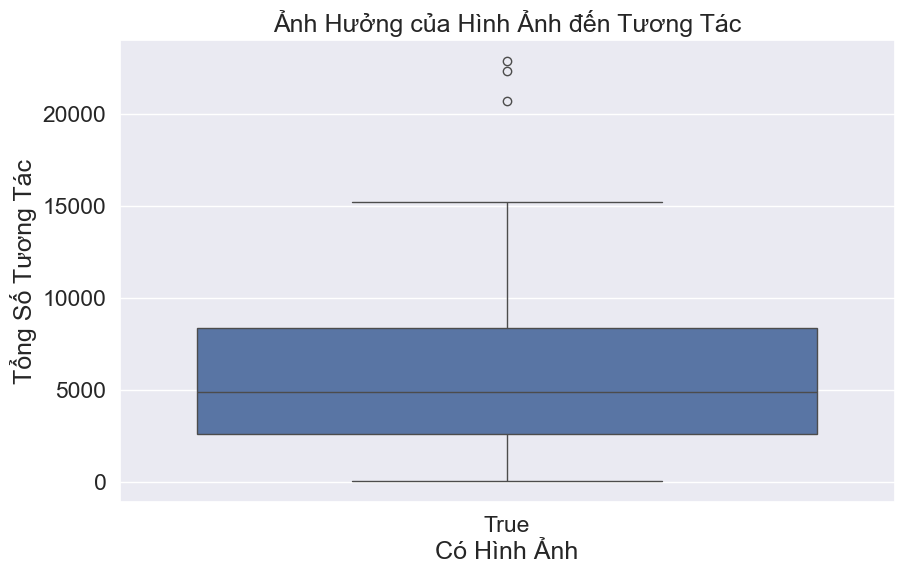

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='has_image', y='total_interactions')
plt.title('·∫¢nh H∆∞·ªüng c·ªßa H√¨nh ·∫¢nh ƒë·∫øn T∆∞∆°ng T√°c')
plt.xlabel('C√≥ H√¨nh ·∫¢nh')
plt.ylabel('T·ªïng S·ªë T∆∞∆°ng T√°c')
plt.show()

## S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n theo th·ªùi gian

In [28]:
# H√†m ƒë·ªÉ tr√≠ch xu·∫•t th√¥ng tin th·ªùi gian t·ª´ chu·ªói b√¨nh lu·∫≠n
def extract_comment_time(comment_str):
    # T√¨m t·∫•t c·∫£ c√°c chu·ªói kh·ªõp v·ªõi ƒë·ªãnh d·∫°ng datetime trong Python
    datetime_matches = re.findall(r'datetime\.datetime\((.*?)\)', comment_str)

    # Chuy·ªÉn ƒë·ªïi chu·ªói t√¨m ƒë∆∞·ª£c th√†nh datetime objects
    datetime_objects = []
    for match in datetime_matches:
        try:
            # Chuy·ªÉn chu·ªói th√†nh c√°c tham s·ªë s·ªë nguy√™n
            datetime_params = [int(x) for x in match.split(',')]
            # T·∫°o datetime object t·ª´ c√°c tham s·ªë
            datetime_objects.append(datetime(*datetime_params))
        except:
            continue
    return datetime_objects

In [29]:
comment_times = df['comments_full'].dropna().apply(extract_comment_time)

In [30]:
all_comment_times = []
for times_list in comment_times:
    all_comment_times.extend(times_list)

# ƒê·∫øm s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n theo gi·ªù
comment_counts_by_hour = Counter([dt.hour for dt in all_comment_times])

# Chuy·ªÉn ƒë·ªïi k·∫øt qu·∫£ v√†o DataFrame cho vi·ªác tr·ª±c quan h√≥a
comment_counts_df = pd.DataFrame(list(comment_counts_by_hour.items()), columns=['Hour', 'Comment Count'])

# S·∫Øp x·∫øp d·ªØ li·ªáu theo gi·ªù
comment_counts_df.sort_values('Hour', inplace=True)

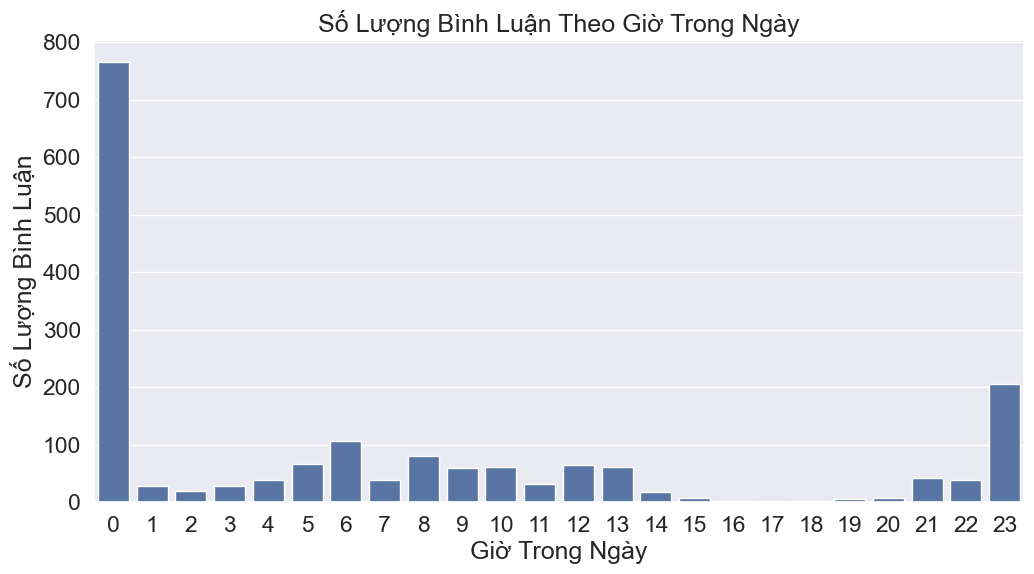

In [31]:
# Tr·ª±c quan h√≥a s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n theo gi·ªù trong ng√†y
plt.figure(figsize=(12, 6))
sns.barplot(data=comment_counts_df, x='Hour', y='Comment Count')
plt.title('S·ªë L∆∞·ª£ng B√¨nh Lu·∫≠n Theo Gi·ªù Trong Ng√†y')
plt.xlabel('Gi·ªù Trong Ng√†y')
plt.ylabel('S·ªë L∆∞·ª£ng B√¨nh Lu·∫≠n')
plt.xticks(range(0, 24))
plt.show()

## T·ª´ kh√≥a ph·ªï bi·∫øn trong c√°c comments

In [32]:
# Tr√≠ch xu·∫•t v√† l√†m s·∫°ch n·ªôi dung vƒÉn b·∫£n t·ª´ c√°c b√¨nh lu·∫≠n
def extract_clean_comment_text(comment_str):
    # T√¨m t·∫•t c·∫£ c√°c n·ªôi dung b√¨nh lu·∫≠n trong chu·ªói
    comment_text_matches = re.findall(r"'comment_text': '(.*?)'", comment_str)
    return ' '.join(comment_text_matches)

In [33]:
cleaned_comment_texts = df['comments_full'].dropna().apply(extract_clean_comment_text)
all_cleaned_comment_texts = ' '.join(cleaned_comment_texts)

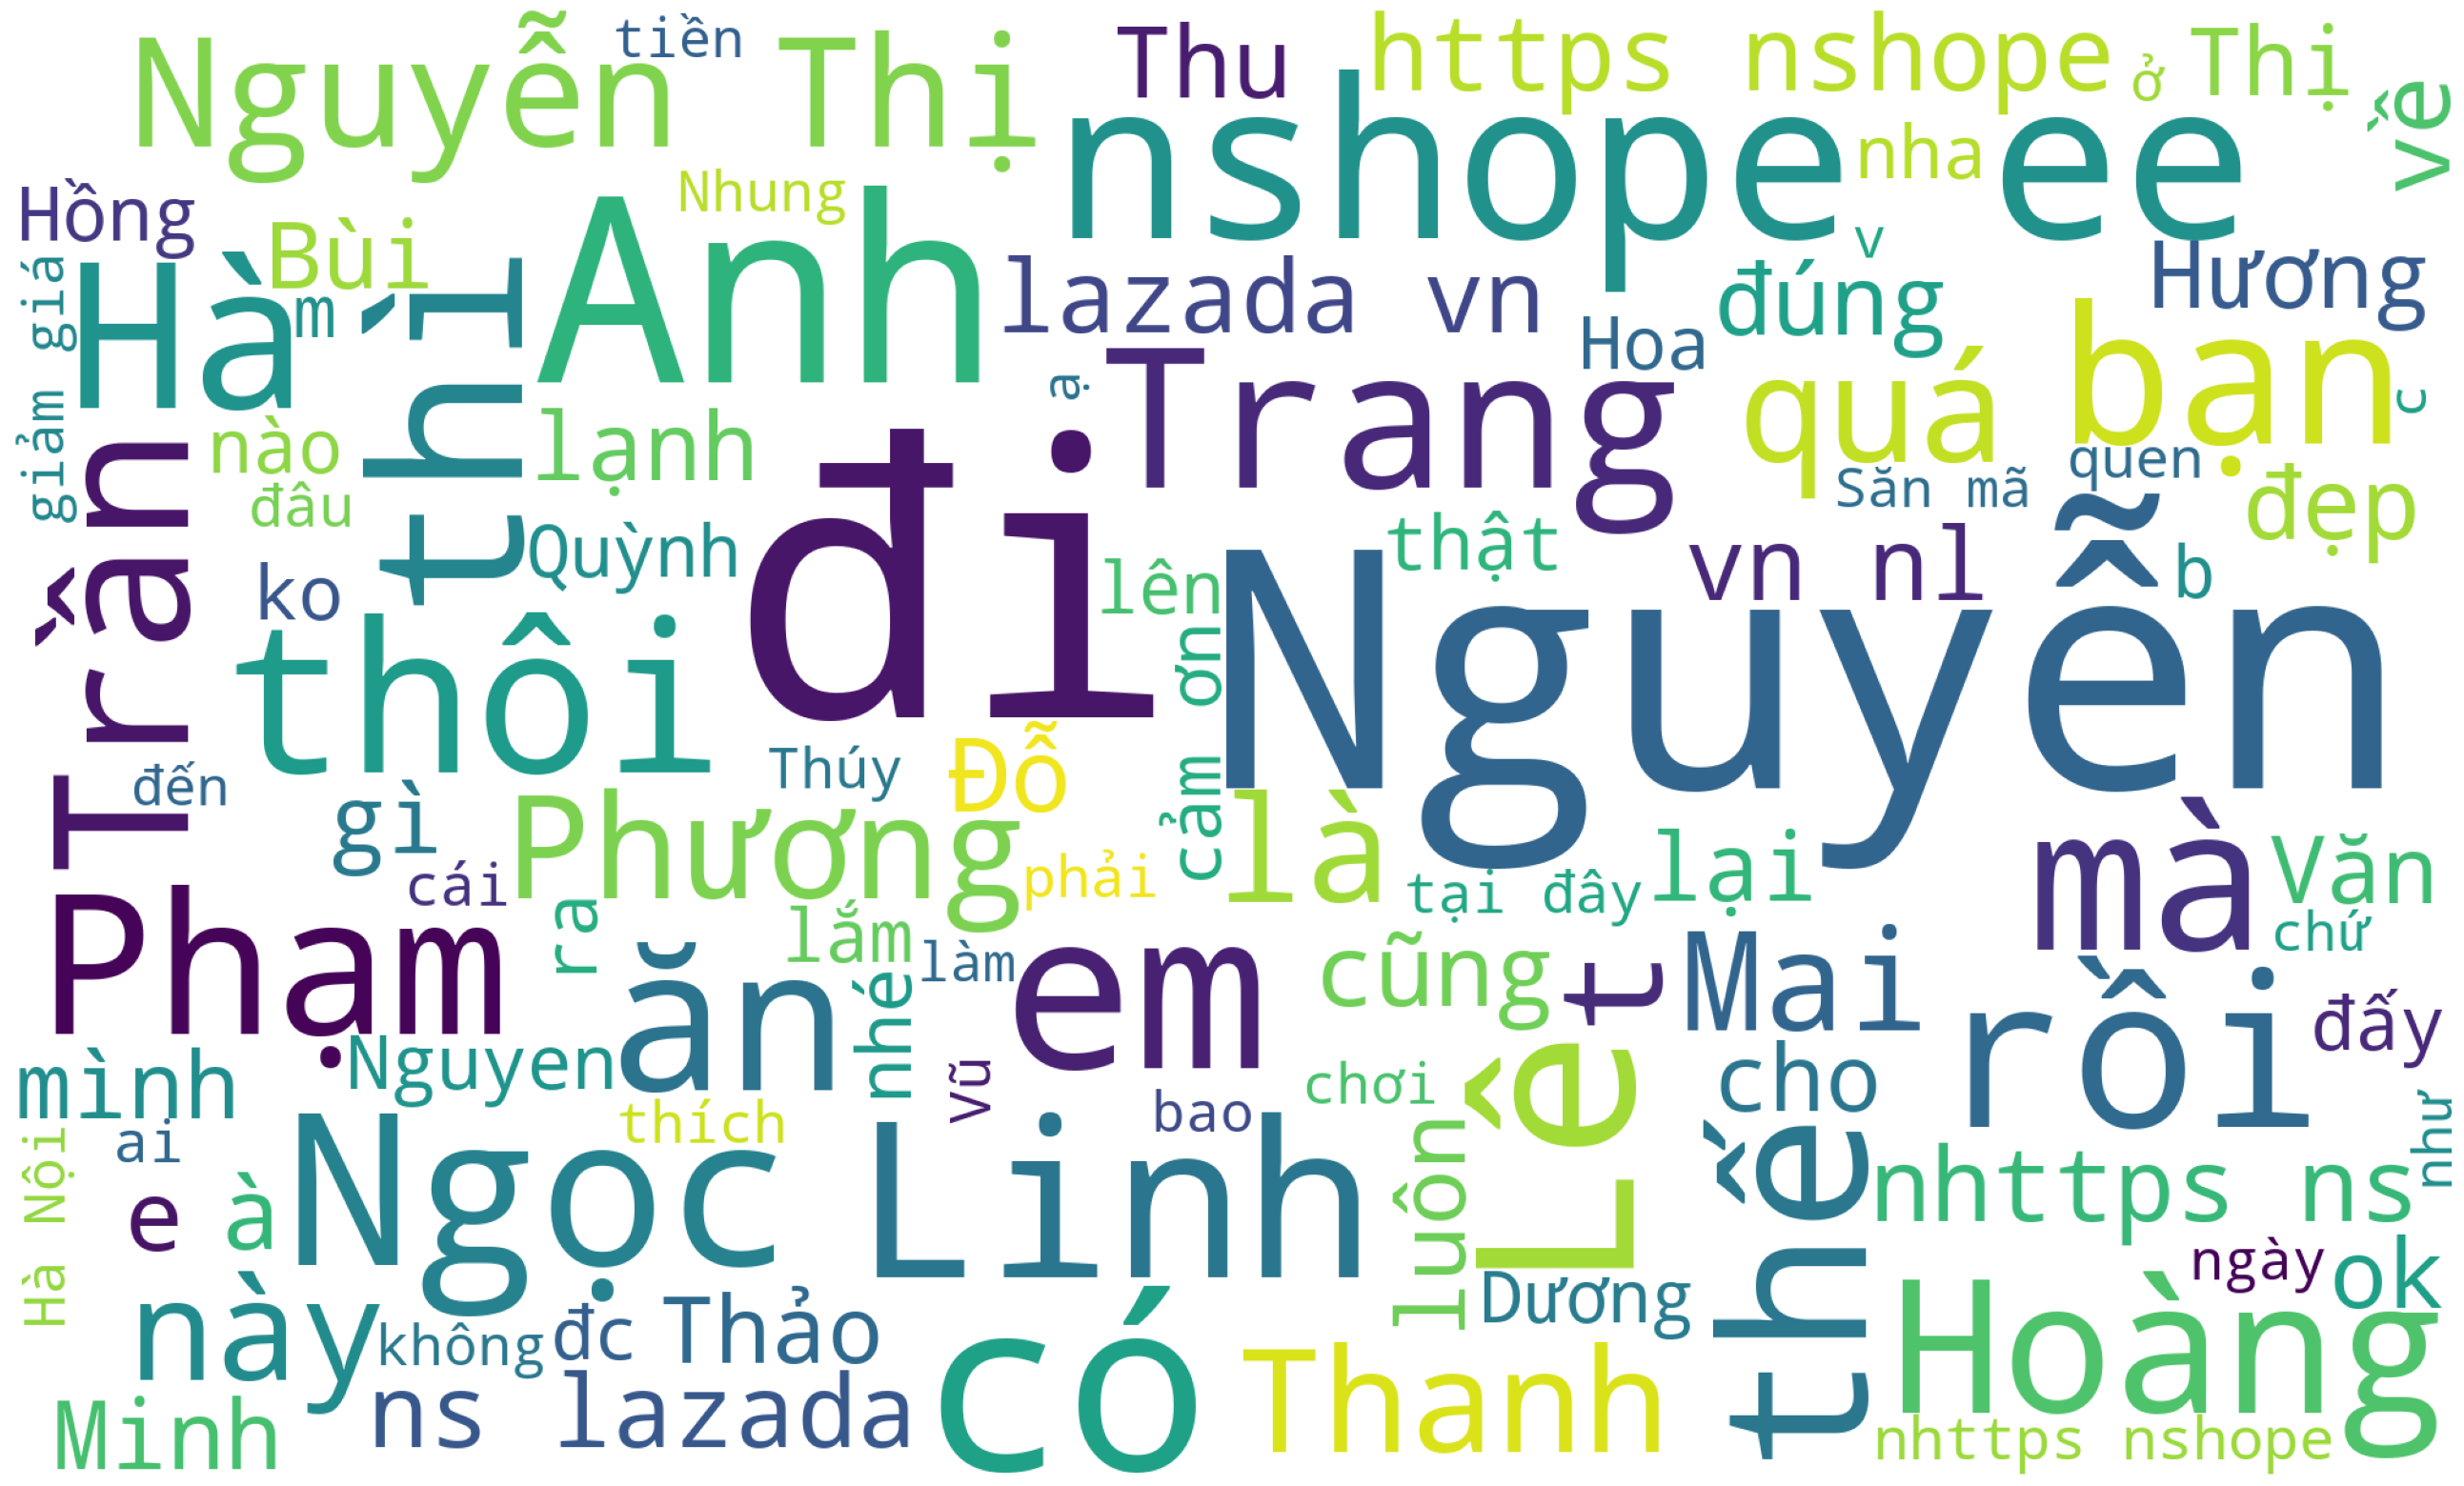

In [34]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      max_words=100, width=2000, height=1200).generate(all_cleaned_comment_texts)

# Tr·ª±c quan h√≥a WordCloud
plt.figure(figsize=(40, 20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## T∆∞∆°ng quan gi·ªØa th·ªùi gian ƒëƒÉng, ƒë·ªô d√†i b√†i vi·∫øt, v√† lo·∫°i b√†i ƒëƒÉng

In [35]:
# T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan
correlation_matrix = df[['time', 'post_length', 'likes', 'comments', 'shares']].corr()

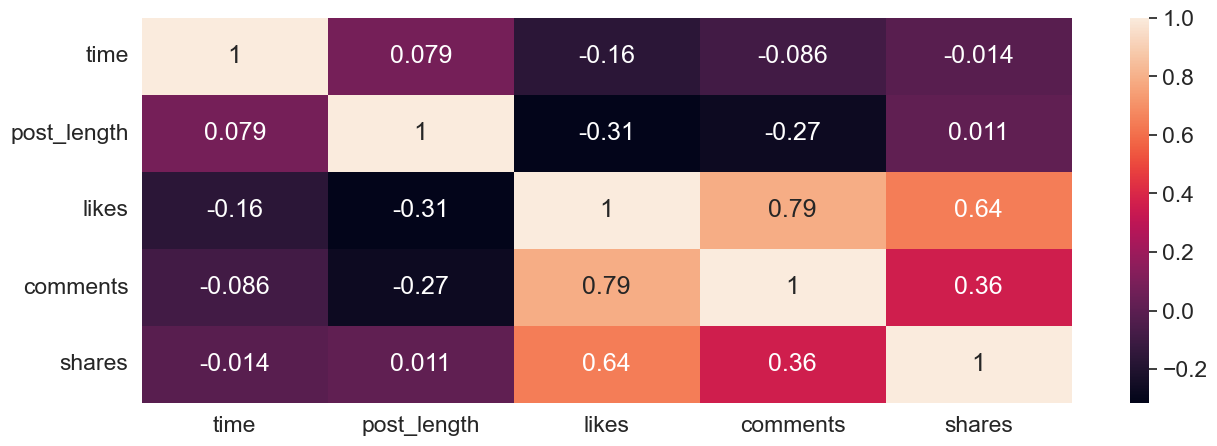

In [36]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## S·ª± bi·∫øn ƒë·ªïi c·ªßa s·ªë l∆∞·ª£ng reactions, shares, comments theo th·ªùi gian

In [37]:
df['date'] = df['time'].dt.date

In [38]:
daily_summary = df.groupby('date').agg(
    total_reactions=('reaction_count', 'sum'),
    total_comments=('comments', 'sum'),
    total_shares=('shares', 'sum')
).reset_index()

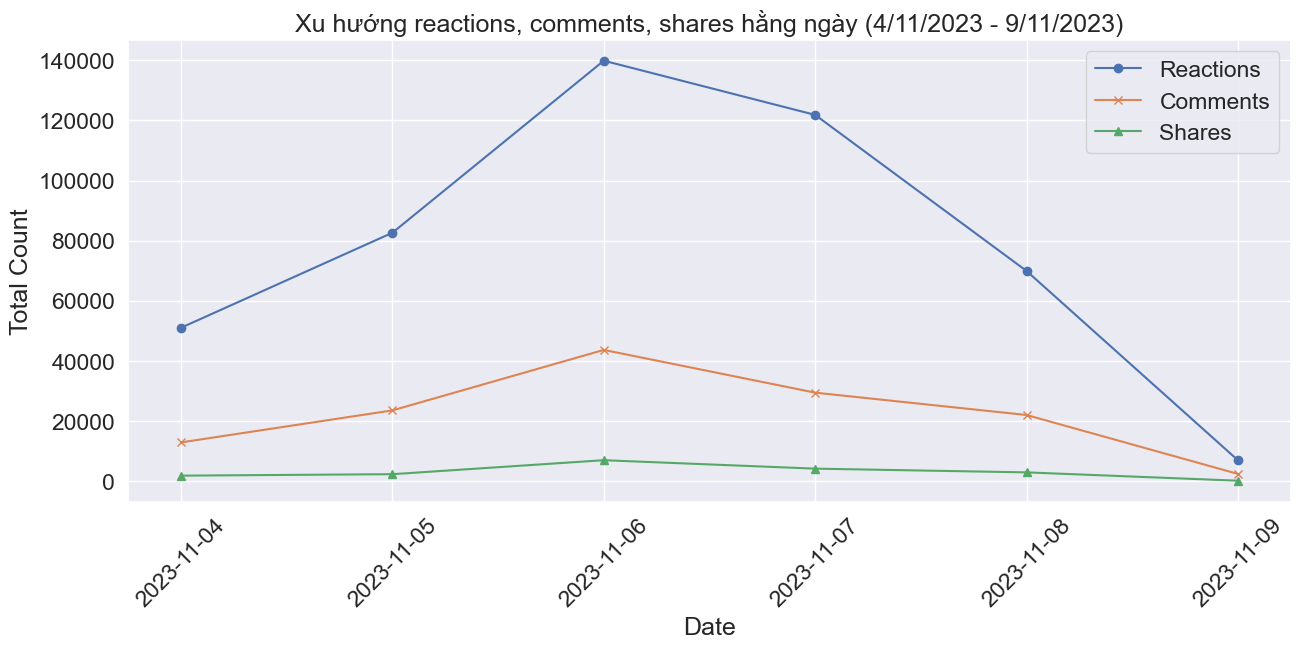

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(daily_summary['date'].astype(str), daily_summary['total_reactions'], label='Reactions', marker='o')
plt.plot(daily_summary['date'].astype(str), daily_summary['total_comments'], label='Comments', marker='x')
plt.plot(daily_summary['date'].astype(str), daily_summary['total_shares'], label='Shares', marker='^')

plt.title('Xu h∆∞·ªõng reactions, comments, shares h·∫±ng ng√†y (4/11/2023 - 9/11/2023)')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()